In [1]:
# Suport Vector Machine
# classificação linear da SVM
# funciona bem em dados linearmente separáveis
# pode ser usado para regressão

# classificação de margem suave
# classificação de margem rígida

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # comprimento da pétala, largura da pétala
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

c:\Users\hudso\ML_PATH\my_env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [ ]:
# Classificação SVM não linear
# adicionar características polinomiais
# adicionar similaridade de características gaussiana (RBF) - kernel gaussiano
# adicionar similaridade de características gaussiana (RBF) - kernel polinomial
# adicionar similaridade de características gaussiana (RBF) - kernel sigmóide


In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

polynomial_svm_clf.fit(X, y)


c:\Users\hudso\ML_PATH\my_env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hudso\ML_PATH\my_env\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

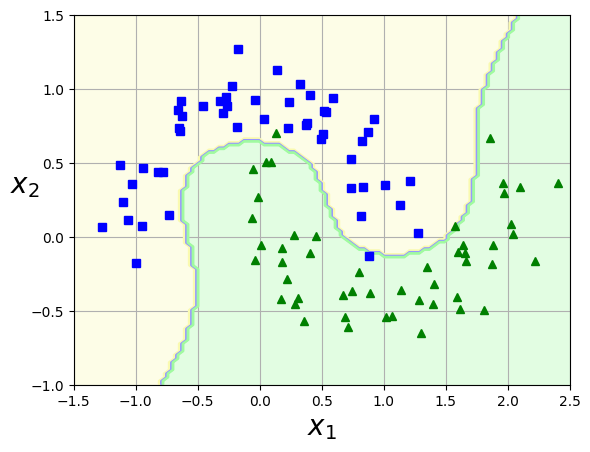

In [4]:
# plotando gráfico
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_dataset(X, y, axes):
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
        
        x0s = np.linspace(axes[0], axes[1], 100)
        x1s = np.linspace(axes[2], axes[3], 100)
        
        x0, x1 = np.meshgrid(x0s, x1s)
        X = np.c_[x0.ravel(), x1.ravel()]
        
        y_pred = clf.predict(X).reshape(x0.shape)
        
        custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
        
        plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=custom_cmap)
        plt.contour(x0, x1, y_pred, cmap=custom_cmap)
    
# plotando gráfico
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

    

In [5]:
# kernel polinomial
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

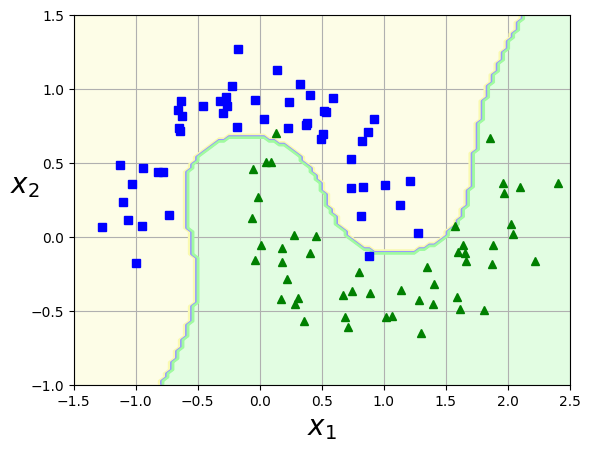

In [8]:
# plotando gráfico
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

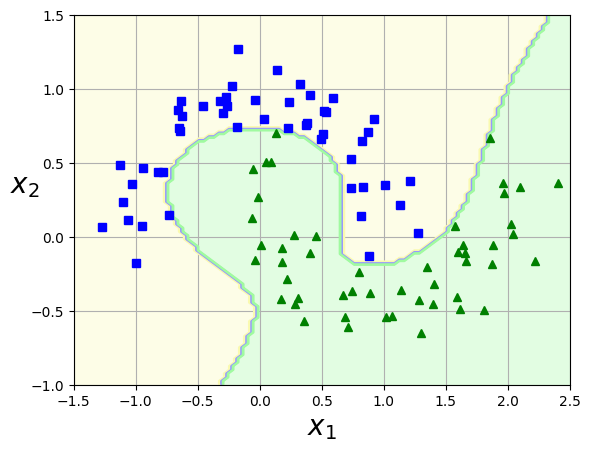

In [9]:

# um de grau 3 e outro de grau 10
# coef0 controla até que ponto o modelo é influenciado por polinômios de grau alto versus baixo

poly100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly100_kernel_svm_clf.fit(X, y)

# plotando gráfico
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
